In [186]:
import pandas as pd
import os

In [187]:
df = pd.read_csv(os.path.join("dataset", "train.csv"))

In [188]:
df = df.sample(1200, random_state=0).reset_index(drop=True)

In [189]:
df.shape

(1200, 3)

In [190]:
df.head()

,Class Index,Title,Description
0,4,First class to the moon,London - British airline magnate Richard Brans...
1,4,Amazon #39;s Holiday Pi,Leave it to Amazon.com (Nasdaq: AMZN). Apparen...
2,4,Will historic flight launch space tourism?,"Regardless, space competitions are poised to b..."
3,1,Thais Drop Peace Bombs On Muslims,(CBS) Millions of folded paper cranes fluttere...
4,3,U.S. Economy Grows at Slower Pace Than Expected,Struggling under the weight of a bloated trade...


# Qualité

In [191]:
df.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

<Axes: ylabel='count'>

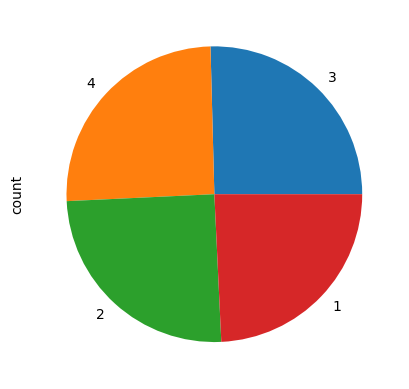

In [192]:
df["Class Index"].value_counts().plot.pie()

In [193]:
df["Title"].duplicated().sum()

1

In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [195]:
vectorizer = TfidfVectorizer(stop_words="english", min_df=0.01)
X = vectorizer.fit_transform(df["Title"])

In [196]:
X.shape

(1200, 25)

In [197]:
vectorizer.vocabulary_

{'39': 0,
 'iraq': 8,
 'profit': 14,
 'says': 18,
 'sales': 17,
 'game': 5,
 'talks': 21,
 'afp': 1,
 'win': 23,
 'new': 12,
 'oil': 13,
 'stocks': 20,
 'lt': 10,
 'gt': 7,
 'shares': 19,
 'reuters': 15,
 'china': 3,
 'korea': 9,
 'ap': 2,
 'google': 6,
 'wins': 24,
 'microsoft': 11,
 'update': 22,
 'rise': 16,
 'deal': 4}

In [198]:
vectorizer.get_feature_names_out()

array(['39', 'afp', 'ap', 'china', 'deal', 'game', 'google', 'gt', 'iraq',
       'korea', 'lt', 'microsoft', 'new', 'oil', 'profit', 'reuters',
       'rise', 'sales', 'says', 'shares', 'stocks', 'talks', 'update',
       'win', 'wins'], dtype=object)

In [199]:
res = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [200]:
res.shape

(1200, 25)

In [201]:
res.head()

,39,afp,ap,china,deal,game,google,gt,iraq,korea,...,reuters,rise,sales,says,shares,stocks,talks,update,win,wins
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

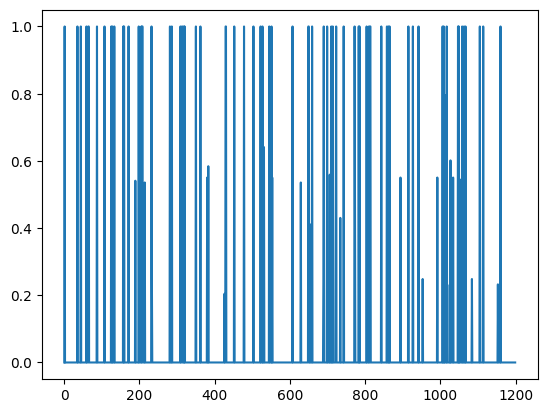

In [202]:
res["39"].plot()

In [203]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [204]:
pca = PCA()
pca.fit(res)

PCA()

Text(0, 0.5, 'Variance Explained')

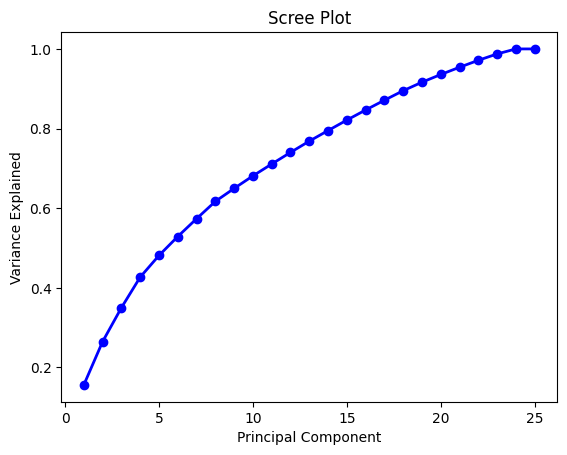

In [205]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

In [206]:
X = pca.fit_transform(res)

In [207]:
X.shape

(1200, 25)

In [208]:
df1 = pd.DataFrame(X, columns=range(pca.n_components_))

In [209]:
df1["target"] = df["Class Index"]

In [210]:
df1.to_csv(os.path.join("dataset", "preprocessed_ds.csv"), index=False)